In [1]:
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import time
import os
import numpy as np

from Utils import loader
from Train import train
from Model import Model

In [2]:
imdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/jpgs/rs19_val'
maskdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/uint8/rs19_val'
classes_ = {"rail-track"}
range_train = (0,0)
range_test = (2,2)
range_val = (7,8)

In [3]:
traindata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_train[0],
                      numend=range_train[1],
                      classes=classes_)

testdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_test[0],
                      numend=range_test[1],
                      classes=classes_)

valdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_val[0],
                      numend=range_val[1],
                      classes=classes_)

In [4]:
traindata[0][1].shape

torch.Size([1, 1080, 1920])

In [5]:
traindata[0][0].shape

torch.Size([3, 1080, 1920])

In [6]:
traindata[0][1].dtype

torch.float32

In [7]:
traindata[0][1]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [16]:
batchsize = 1
loss = torch.nn.BCELoss()
lr = 0.01
num_epochs = 50
model_path = ""

In [17]:
model = Model.UNet(num_classes=1)

In [18]:
Trainer = train.TrainSeg(model,
                         traindata,
                         testdata,
                         valdata,
                         classes_,
                         loss,
                         batchsize,
                         lr,
                         num_epochs,
                         model_path)

In [19]:
Trainer.train()

Epoch: 1/50
Train loss: 0.658801, Test loss: 0.6572
Epoch: 2/50
Train loss: 0.656310, Test loss: 0.6544


KeyboardInterrupt: 

In [12]:
Trainer.val()

Average Validation Loss: 0.3409



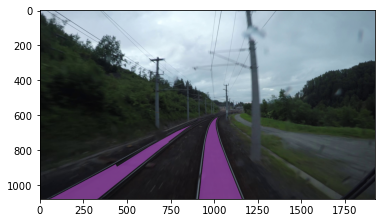

In [13]:
loader.visualize_result(traindata[0][0],traindata[0][1][0,:,:])

In [ ]:
result = model(traindata[0][0].unsqueeze(0))

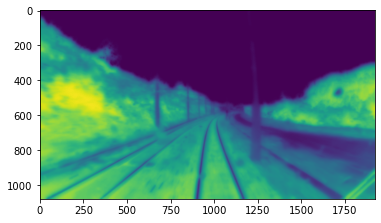

In [14]:
plt.imshow(result.detach().numpy()[0][0])

In [15]:
torch.min(result)

tensor(2.0814e-06, grad_fn=<MinBackward1>)

In [16]:
torch.max(result)

tensor(0.0969, grad_fn=<MaxBackward1>)

In [18]:
result.shape

torch.Size([1, 1, 1080, 1920])

In [19]:
zeros = torch.zeros((1,1080,1920))

In [20]:
loss(result[0],traindata[0][1])

tensor(0.1702, grad_fn=<BinaryCrossEntropyBackward>)